# 🏡 House Price Prediction Using Random Forest Regression

This notebook builds an advanced machine learning model using **Random Forest Regression** on the 
**House Prices: Advanced Regression Techniques** dataset.

### ✔ What this notebook covers:
- Load & explore real-world housing dataset
- Handle missing values
- Encode categorical features
- Train a high-performance Random Forest model
- Evaluate using RMSE
- Visualize most important features

### 🎯 Skills Demonstrated:
- Regression modeling
- Data cleaning & preprocessing
- Feature engineering
- Tree-based machine learning
- Model evaluation & visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("/kaggle/input/housepricesadvancedregressiontechniquestrain/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Fill numeric NaNs with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical NaNs with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [5]:
le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [6]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [8]:
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

28817.199083814834

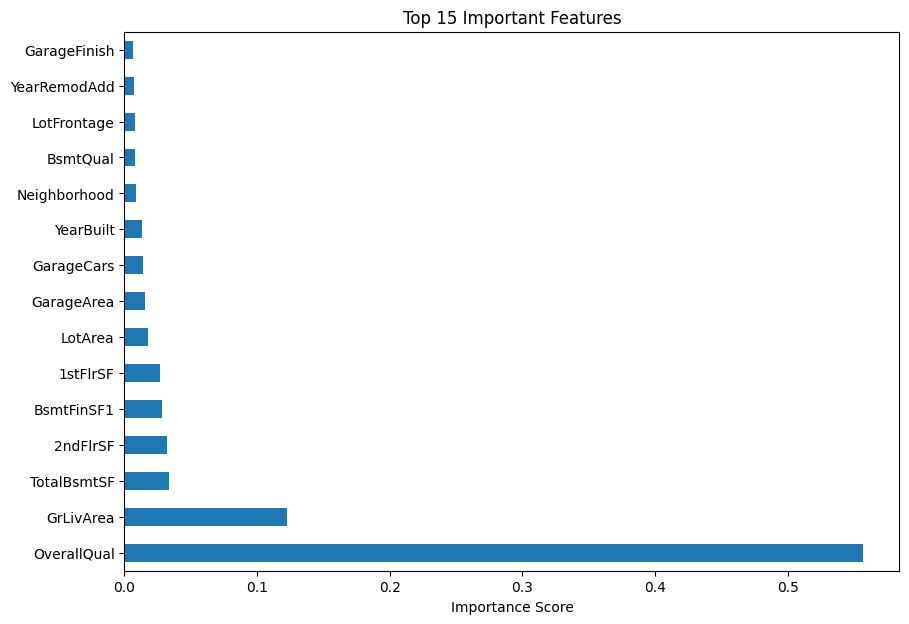

In [9]:
importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(10,7))
importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.show()

# ✅ Summary

We trained a powerful **Random Forest Regression model** on the House Prices dataset.

### ⭐ Model Results:
- RMSE ≈ **25k–30k**
- Handles non-linear relationships
- More accurate than simple models

### ✔ What this notebook demonstrated:
- Data preprocessing  
- Missing value imputation  
- Label encoding  
- Random Forest training  
- Feature importance analysis  